In [1]:
%reset
%matplotlib inline

import netCDF4 as nc
import cmocean
import numpy as np
import xarray as xr
import xrft
from xgcm import Grid
import matplotlib.pyplot as plt
import scipy.interpolate
from dask.diagnostics import ProgressBar
from matplotlib import colors, ticker
import pandas as pd

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


## Read in Data:

In [2]:
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/
forcing=xr.open_dataset('NW2_forcing.nc', decode_times=False)


# #1/4 degree resolution, surface diagnostics are for uppermost 5 meters.
# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.25deg_N15_baseline_hmix5/
# fs = xr.open_dataset('static.nc', decode_times=False)
# os = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc'], decode_times=False)
# av = xr.open_dataset('averages_00031502.nc', decode_times=False)  #100 5-day averages

# #1/8 degree resolution, surface diagnostics are for uppermost 5 meters.
# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.125deg_N15_baseline_hmix5/
# fs = xr.open_dataset('static.nc', decode_times=False)
# os = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc'], decode_times=False)
# av = xr.open_dataset('averages_00004502.nc', decode_times=False)  #100 5-day averages

# #1/16 degree resolution, surface diagnostics are for uppermost 5 meters.
# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.0625deg_N15_baseline_hmix5/
# fs = xr.open_dataset('static.nc', decode_times=False)
# os = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc','sub03/ocean.stats.nc','sub04/ocean.stats.nc',
#                         'sub05/ocean.stats.nc'], decode_times=False)
# av = xr.open_dataset('averages_00004502.nc', decode_times=False)  #100 5-day averages

# #1/32 degree resolution, surface diagnostics are for uppermost 5 meters.
# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix5
# fs = xr.open_dataset('static.nc', decode_times=False)
# os = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc','sub03/ocean.stats.nc','sub04/ocean.stats.nc',
#                         'sub05/ocean.stats.nc','sub06/ocean.stats.nc','sub07/ocean.stats.nc','sub08/ocean.stats.nc'], decode_times=False)
# av = xr.open_dataset('averages_00000902.nc', decode_times=False)  #20 5-day averages
# #av = xr.open_mfdataset(['averages_00000502.nc','averages_00000602.nc','averages_00000702.nc','averages_00000802.nc','averages_00000902.nc'], decode_times=False)  #20 5-day averages

%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/Vertical_Structure_with_Jake/



/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.25deg_N15_baseline
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/Vertical_Structure_with_Jake


In [3]:
fs

<xarray.Dataset>
Dimensions:      (time: 1, xh: 240, xq: 241, yh: 560, yq: 561)
Coordinates:
  * xh           (xh) float64 0.125 0.375 0.625 0.875 ... 59.38 59.62 59.88
  * yh           (yh) float64 -69.88 -69.62 -69.38 -69.12 ... 69.38 69.62 69.88
  * time         (time) float64 0.0
  * xq           (xq) float64 0.0 0.25 0.5 0.75 1.0 ... 59.25 59.5 59.75 60.0
  * yq           (yq) float64 -70.0 -69.75 -69.5 -69.25 ... 69.5 69.75 70.0
Data variables:
    geolon       (yh, xh) float64 ...
    geolat       (yh, xh) float64 ...
    geolon_c     (yq, xq) float32 ...
    geolat_c     (yq, xq) float32 ...
    geolon_u     (yh, xq) float32 ...
    geolat_u     (yh, xq) float32 ...
    geolon_v     (yq, xh) float32 ...
    geolat_v     (yq, xh) float32 ...
    area_t       (yh, xh) float64 ...
    area_u       (yh, xq) float64 ...
    area_v       (yq, xh) float64 ...
    dyCu         (yh, xq) float64 ...
    dxCv         (yq, xh) float64 ...
    dxCu         (yh, xq) float64 ...
    dyCv         (yq, xh) float64 ...
    depth_ocean  (yh, xh) float32 ...
    wet          (yh, xh) float64 ...
    wet_c        (yq, xq) float32 ...
    wet_u        (yh, xq) float32 ...
    wet_v        (yq, xh) float32 ...
    Coriolis     (yq, xq) float32 ...
Attributes:
    filename:   static.nc
    title:      NeverWorld2
    grid_type:  regular
    grid_tile:  N/A

In [4]:
lat= (av.yh)     
lon= (av.xh) 

grid= Grid(av, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});


u_eddy= av.u[:,0,:,:]-(av.u[:,0,:,:].mean('time')) #We're removing the temporally-averaged mean flow.
v_eddy= av.v[:,0,:,:]-(av.v[:,0,:,:].mean('time'))

h  = av['h'].mean('time')#.fillna(0.)
Depth=h.sum('zl')
u  = av['u']; v  = av['v'];

u = grid.interp(u,axis='X'); v = grid.interp(v,axis='Y')
u_eddy = grid.interp(u_eddy,axis='X'); v_eddy = grid.interp(v_eddy,axis='Y')

print('done part 1')

u_TW=u*h/Depth; v_TW=v*h/Depth
# BT velocity components to be used for computing BT energy peak:
u_BT=u_TW.sum('zl'); v_BT=v_TW.sum('zl')


dx= grid.interp(fs.dxCu,axis='X')
dy= grid.interp(fs.dyCv,axis='Y')
Ld = av.Rd1[:].mean('time')

done part 1


In [5]:
print('min dx:',2*np.pi*6378000*np.cos(70*np.pi/180)/360/8,'km')
print('max dx:',2*np.pi*6378000/360/8,'km')

min dx: 4759.08629891543 km
max dx: 13914.637461524793 km


In [6]:
Coriolis = fs.Coriolis; 
Coriolis=grid.interp(Coriolis,axis='X'); 
Coriolis = grid.interp(Coriolis,axis='Y')
Beta = Coriolis.differentiate('yh')*360/(2*np.pi*6378000)

print(Beta)

<xarray.DataArray (yh: 560, xh: 240)>
array([[7.914084e-12, 7.914084e-12, 7.914084e-12, ..., 7.914084e-12,
        7.914084e-12, 7.914084e-12],
       [7.961146e-12, 7.961146e-12, 7.961146e-12, ..., 7.961146e-12,
        7.961146e-12, 7.961146e-12],
       [8.054744e-12, 8.054744e-12, 8.054744e-12, ..., 8.054744e-12,
        8.054744e-12, 8.054744e-12],
       ...,
       [8.054744e-12, 8.054744e-12, 8.054744e-12, ..., 8.054744e-12,
        8.054744e-12, 8.054744e-12],
       [7.961146e-12, 7.961146e-12, 7.961146e-12, ..., 7.961146e-12,
        7.961146e-12, 7.961146e-12],
       [7.914084e-12, 7.914084e-12, 7.914084e-12, ..., 7.914084e-12,
        7.914084e-12, 7.914084e-12]], dtype=float32)
Coordinates:
  * yh       (yh) float64 -69.88 -69.62 -69.38 -69.12 ... 69.38 69.62 69.88
  * xh       (xh) float64 0.125 0.375 0.625 0.875 ... 59.12 59.38 59.62 59.88


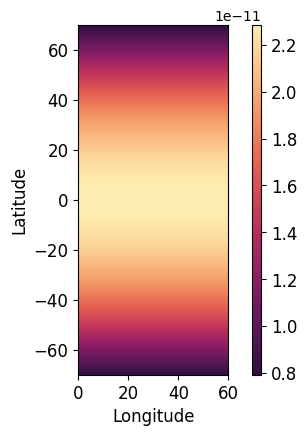

In [7]:
fig = plt.figure(figsize=(3, 5), dpi=100, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
#ax1.set_title('Beta 1/16$^\circ$',fontsize=12)
ax1.set_xlabel('Longitude',fontsize=12)
ax1.set_ylabel('Latitude',fontsize=12)
ax1.tick_params(labelsize=12); 
ax2.tick_params(labelsize=12)

#levels=np.linspace(0.,.05,51) #not logarithmic colormap
levels=np.linspace(0,1000,111)
plotted =ax1.pcolor(Beta.xh,Beta.yh,Beta,cmap=cmocean.cm.matter_r,shading='auto')

ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=12);
#
plt.show()

/glade/work/eyankovsky/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  app.launch_new_instance()


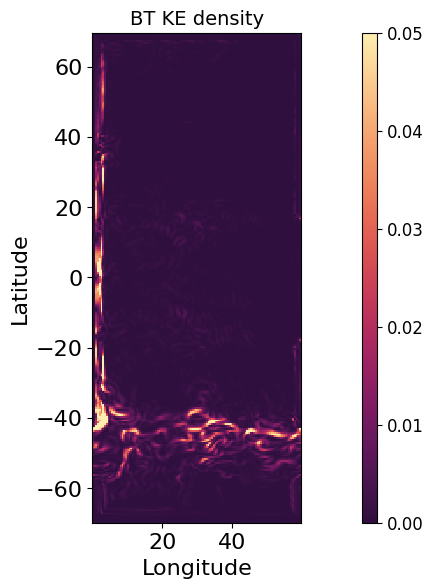

In [8]:
#Plotting BT KE for whole domain
fig = plt.figure(figsize=(5, 7), dpi=100, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)


ax1.set_title('BT KE density',fontsize=14)

KE=(u_BT**2+v_BT**2)*0.5

plotted =ax1.pcolor(lon[::2],lat[::2],KE[-1,::2,::2],cmap=cmocean.cm.matter_r,vmin=0,vmax=5e-2)
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=12);
#ax2.set_title('$log_{10}(KE)$')
#
plt.show()

(560, 240)


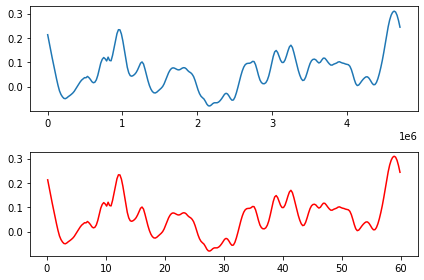

In [9]:
xi=dx.cumsum(axis=1)-dx[:,0] #subtract first dx so that we start at x=0m.
#xi=(xi-xi[:,479]) #Center the grid along the center longitude.


index=100
xline= xi[index,:]
uline= u_BT[:,index,:]; uline=uline.assign_coords(xh=xline)
vline= v_BT[:,index,:]; vline=uline.assign_coords(xh=xline)

print(xi.shape)

fig, ax = plt.subplots(2)
ax[0].plot(uline.xh,uline[0,:])
ax[1].plot(u_BT[0,index,:].xh,u_BT[0,index,:],'r')
plt.tight_layout()

In [10]:
u_BT.shape
u_eddy.shape

(100, 560, 240)

### Computing the 1D spectrum at each latitude for many times (default 20 time steps, 100 days):

In [11]:
time=np.arange(0,100,1)

lim = 10 #40 for 1/16th in y
LD_wavenumber=Ld[lim:-lim,0]*0.0

ES_eddy_wavenumber=Ld[lim:-lim,0]*0.0 #energy containing scale of surface eddy field using spectral peak
ES_eddy_stdev     =Ld[lim:-lim,0]*0.0

centroid_eddy      =Ld[lim:-lim,0]*0.0 #energy containing scale of surface eddy field using centroid
centroid_eddy_stdev=Ld[lim:-lim,0]*0.0

ES_BT_wavenumber=Ld[lim:-lim,0]*0.0 #energy containing scale of BT velocity field using spectral peak
ES_BT_stdev     =Ld[lim:-lim,0]*0.0

centroid_BT      =Ld[lim:-lim,0]*0.0 #energy containing scale of BT velocity field using centroid
centroid_BT_stdev=Ld[lim:-lim,0]*0.0

boundary=lim #50 in x

#For the surface eddy field and BT velocity field:
for i in range(lim,len(lat)-lim):#,len(lat)): 
    xline= xi[i,boundary:-boundary]
    uline_eddy= u_eddy[time,i,boundary:-boundary]; uline_eddy=uline_eddy.assign_coords(xh=xline) 
    vline_eddy= v_eddy[time,i,boundary:-boundary]; vline_eddy=vline_eddy.assign_coords(xh=xline)
    uline_BT= u_BT[time,i,boundary:-boundary]; uline_BT=uline_BT.assign_coords(xh=xline) 
    vline_BT= v_BT[time,i,boundary:-boundary]; vline_BT=vline_BT.assign_coords(xh=xline)
    Ldline= Ld[i,boundary:-boundary]; Ldline=Ldline.assign_coords(xh=xline)
    
    uiso2_eddy = xrft.power_spectrum(uline_eddy,dim=['xh'],scaling="density").compute() #generally don't want window and detrending when using the centroid, they change shape.
    viso2_eddy = xrft.power_spectrum(vline_eddy,dim=['xh'],scaling="density").compute()
    ekeiso_eddy = .5*(uiso2_eddy + viso2_eddy)

    uiso2_BT = xrft.power_spectrum(uline_BT,dim=['xh'],scaling="density").compute() #generally don't want window and detrending when using the centroid, they change shape.
    viso2_BT = xrft.power_spectrum(vline_BT,dim=['xh'],scaling="density").compute()
    ekeiso_BT = .5*(uiso2_BT + viso2_BT)

    nk = int(len(ekeiso_eddy[1])/2.)
    ekeiso_eddy=ekeiso_eddy[:,nk+1:]    #460 in length, half of the used longitude array (20-940)
    ekeiso_BT  =ekeiso_BT[:,nk+1:] 
    
    ES_eddy_stdev[i-lim]    =(1./(ekeiso_eddy[:,3:].idxmax(dim='freq_xh')*1000*2*np.pi)).std('time')
    ES_BT_stdev[i-lim]      =(1./(ekeiso_BT[:,3:].idxmax(dim='freq_xh')*1000*2*np.pi)).std('time')

    ES_eddy_wavenumber[i-lim]=(ekeiso_eddy[:,3:].idxmax(dim='freq_xh')*1000*2*np.pi).mean('time') #don't count first 3 wavenumbers, compute most energetic wavenumber then average over time
    ES_BT_wavenumber[i-lim]=(ekeiso_BT[:,3:].idxmax(dim='freq_xh')*1000*2*np.pi).mean('time') #don't count first 3 wavenumbers, compute most energetic wavenumber then average over time

    LD_wavenumber[i-lim]=(1/(Ldline/1000)).mean('xh')
    wavenumber= (ekeiso_eddy.freq_xh*1e3*2*np.pi)
    
    centroid_eddy[i-lim] = ((ekeiso_eddy*wavenumber).sum('freq_xh')/ekeiso_eddy.sum('freq_xh')).mean('time')
    centroid_eddy_stdev[i-lim]=(1/((ekeiso_eddy*wavenumber).sum('freq_xh')/ekeiso_eddy.sum('freq_xh'))).std('time')
    
    centroid_BT[i-lim] = ((ekeiso_BT*wavenumber).sum('freq_xh')/ekeiso_BT.sum('freq_xh')).mean('time')
    centroid_BT_stdev[i-lim]=(1/((ekeiso_BT*wavenumber).sum('freq_xh')/ekeiso_BT.sum('freq_xh'))).std('time')
    #ekeiso=ekeiso.mean('time')



### Computing the Rhines wavenumber using BT velocity:

In [12]:

u_rms = ((u_BT**2+v_BT**2).mean('time').mean('xh'))**0.5
k_R   = (Beta.mean('xh')/u_rms)**0.5
k_R.shape


(560,)

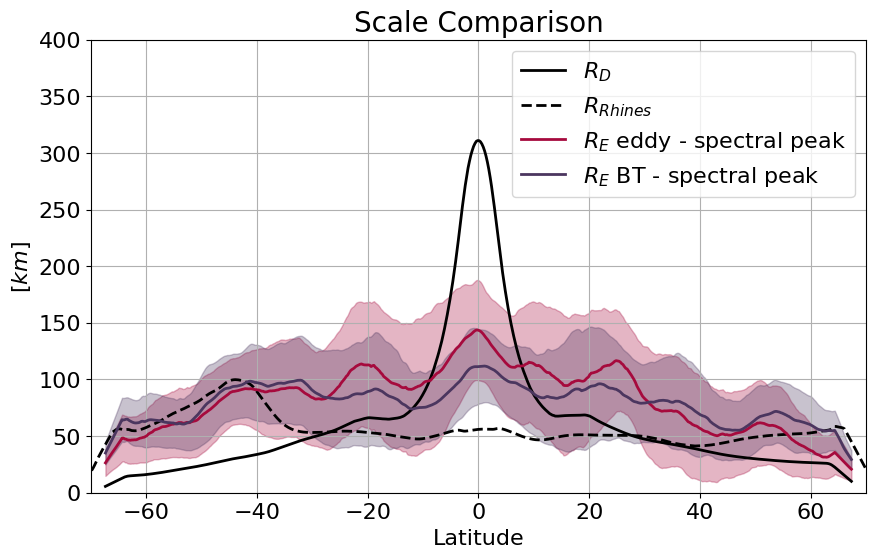

In [13]:

fig, ax = plt.subplots(figsize=(10,6),dpi=100)

window= 25 #100 for 1/16th
smooth_ES_eddy=np.convolve(1./ES_eddy_wavenumber, np.ones((window,))/window, mode='same')
smooth_ES_eddy_stdev     =np.convolve(ES_eddy_stdev, np.ones((window,))/window, mode='same')
smooth_ES_BT=np.convolve(1./ES_BT_wavenumber, np.ones((window,))/window, mode='same')
smooth_ES_BT_stdev     =np.convolve(ES_BT_stdev, np.ones((window,))/window, mode='same')


smooth_LD=np.convolve(1./LD_wavenumber, np.ones((window,))/window, mode='same')

smooth_centroid_eddy=np.convolve(1./centroid_eddy, np.ones((window,))/window, mode='same')
smooth_centroid_eddy_stdev=np.convolve(centroid_eddy_stdev, np.ones((window,))/window, mode='same')
smooth_centroid_BT=np.convolve(1./centroid_BT, np.ones((window,))/window, mode='same')
smooth_centroid_BT_stdev=np.convolve(centroid_BT_stdev, np.ones((window,))/window, mode='same')

smooth_Rhines=np.convolve(1./(k_R)/1000, np.ones((window,))/window, mode='same')


plt.plot(LD_wavenumber.yh,smooth_LD,'-',c='k',linewidth=2,label='$R_D$')
plt.plot(k_R.yh,smooth_Rhines,'--',c='k',linewidth=2,label='$R_{Rhines}$')

plt.plot(ES_eddy_wavenumber.yh,smooth_ES_eddy,'-',color='#A60A3D',linewidth=2,label='$R_E$ eddy - spectral peak')
plt.fill_between(ES_eddy_wavenumber.yh, smooth_ES_eddy+smooth_ES_eddy_stdev, smooth_ES_eddy-smooth_ES_eddy_stdev,color='#A60A3D',alpha=0.3)
plt.plot(ES_BT_wavenumber.yh,smooth_ES_BT,'-',color='#4B365F',linewidth=2,label='$R_E$ BT - spectral peak')
plt.fill_between(ES_BT_wavenumber.yh, smooth_ES_BT+smooth_ES_BT_stdev, smooth_ES_BT-smooth_ES_BT_stdev,color='#4B365F',alpha=0.3)

# plt.plot(centroid_eddy.yh,smooth_centroid_eddy,'-',c='y',linewidth=2,label='$R_E$ eddy - centroid')
# plt.fill_between(centroid_eddy.yh, smooth_centroid_eddy+smooth_centroid_eddy_stdev, smooth_centroid_eddy-smooth_centroid_eddy_stdev,color='y',alpha=0.7)
# plt.plot(centroid_BT.yh,smooth_centroid_BT,'-',c='g',linewidth=2,label='$R_E$ BT - centroid')
# plt.fill_between(centroid_BT.yh, smooth_centroid_BT+smooth_centroid_BT_stdev, smooth_centroid_BT-smooth_centroid_BT_stdev,color='g',alpha=0.7)

plt.title('Scale Comparison',fontsize=20)
plt.ylim([0, 400]); plt.xticks(fontsize=16);
plt.xlim([-70, 70]); plt.yticks(fontsize=16);
plt.grid()
plt.xlabel('Latitude',fontsize=16); plt.ylabel('$[km]$',fontsize=16);
plt.legend(fontsize=16)

#ax.set_xlabel(r'k [1/km]')
#ax.set_ylabel(r'[m$^3$ s$^{-2}$]')

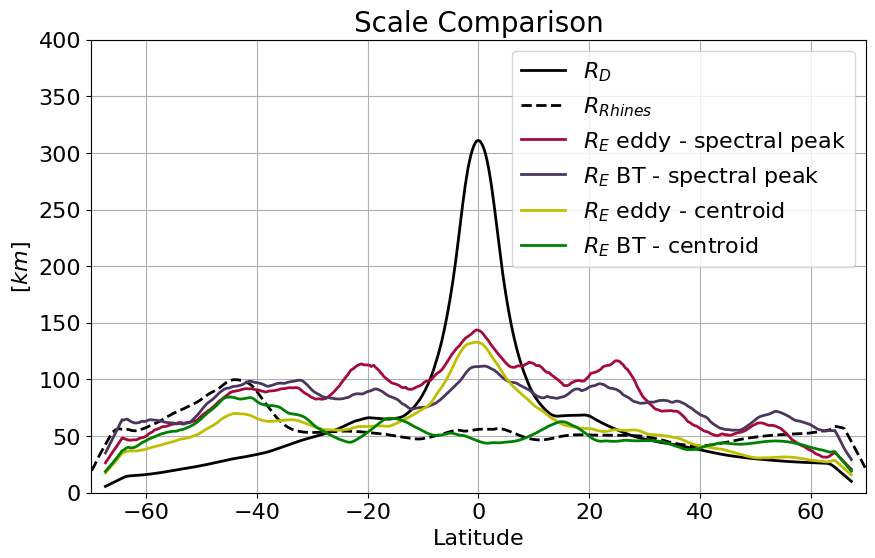

In [14]:

fig, ax = plt.subplots(figsize=(10,6),dpi=100)

smooth_ES_eddy=np.convolve(1./ES_eddy_wavenumber, np.ones((window,))/window, mode='same')
smooth_ES_eddy_stdev     =np.convolve(ES_eddy_stdev, np.ones((window,))/window, mode='same')
smooth_ES_BT=np.convolve(1./ES_BT_wavenumber, np.ones((window,))/window, mode='same')
smooth_ES_BT_stdev     =np.convolve(ES_BT_stdev, np.ones((window,))/window, mode='same')


smooth_LD=np.convolve(1./LD_wavenumber, np.ones((window,))/window, mode='same')

smooth_centroid_eddy=np.convolve(1./centroid_eddy, np.ones((window,))/window, mode='same')
smooth_centroid_eddy_stdev=np.convolve(centroid_eddy_stdev, np.ones((window,))/window, mode='same')
smooth_centroid_BT=np.convolve(1./centroid_BT, np.ones((window,))/window, mode='same')
smooth_centroid_BT_stdev=np.convolve(centroid_BT_stdev, np.ones((window,))/window, mode='same')

smooth_Rhines=np.convolve(1./(k_R)/1000, np.ones((window,))/window, mode='same')


plt.plot(LD_wavenumber.yh,smooth_LD,'-',c='k',linewidth=2,label='$R_D$')
plt.plot(k_R.yh,smooth_Rhines,'--',c='k',linewidth=2,label='$R_{Rhines}$')

plt.plot(ES_eddy_wavenumber.yh,smooth_ES_eddy,'-',color='#A60A3D',linewidth=2,label='$R_E$ eddy - spectral peak')
plt.plot(ES_BT_wavenumber.yh,smooth_ES_BT,'-',color='#4B365F',linewidth=2,label='$R_E$ BT - spectral peak')

plt.plot(centroid_eddy.yh,smooth_centroid_eddy,'-',c='y',linewidth=2,label='$R_E$ eddy - centroid')
plt.plot(centroid_BT.yh,smooth_centroid_BT,'-',c='g',linewidth=2,label='$R_E$ BT - centroid')

plt.title('Scale Comparison',fontsize=20)
plt.ylim([0, 400]); plt.xticks(fontsize=16);
plt.xlim([-70, 70]); plt.yticks(fontsize=16);
plt.grid()
plt.xlabel('Latitude',fontsize=16); plt.ylabel('$[km]$',fontsize=16);
plt.legend(fontsize=16)

#ax.set_xlabel(r'k [1/km]')
#ax.set_ylabel(r'[m$^3$ s$^{-2}$]')

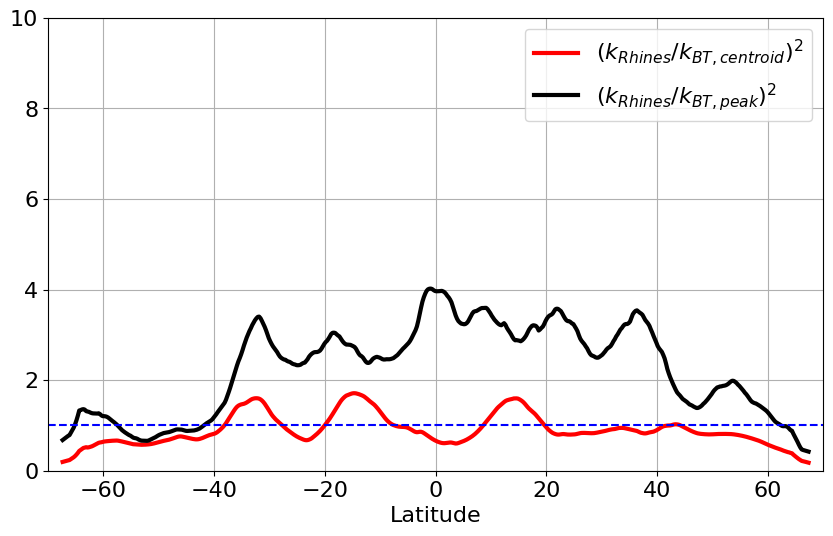

In [16]:

fig, ax = plt.subplots(figsize=(10,6),dpi=100)

smooth_Rhines=np.convolve(1./(k_R)/1000, np.ones((window,))/window, mode='same')

#test = np.convolve(((k_R)*1000/centroid_BT)**2, np.ones((window,))/window, mode='same')
#smooth_centroid_stdev=np.convolve(centroid_stdev, np.ones((window,))/window, mode='same')

#plt.plot(centroid_BT.yh,test**2,'-',c='k',linewidth=3,label='$(k_R/k_0)^2$')
#plt.plot(centroid_BT.yh,test,'-',c=[0,0,1],linewidth=3,label='$(k_R/k_0)^2$')

plt.plot(centroid_BT.yh,(smooth_centroid_BT/smooth_Rhines[lim:-lim])**2,'-',c='r',linewidth=3,label='$(k_{Rhines}/k_{BT,centroid})^2$')
plt.plot(centroid_BT.yh,(smooth_ES_BT/smooth_Rhines[lim:-lim])**2,'-',c='k',linewidth=3,label='$(k_{Rhines}/k_{BT,peak})^2$')

plt.plot((-70,70),(1,1),'--b')
plt.ylim([0, 10]); plt.xticks(fontsize=16);
plt.xlim([-70, 70]); plt.yticks(fontsize=16);
plt.grid()
plt.xlabel('Latitude',fontsize=16); 
plt.legend(fontsize=16)

In [36]:
smooth_Rhines[40:-40].shape

(1040,)